In [1]:
import pandas as pd

# Leer el CSV
df = pd.read_csv('../../datos/giovanni/migrantes_stock_1990_2024.csv')

# Calcular la tasa de crecimiento anual compuesta (CAGR)
df['tasa_crecimiento'] = ((df['2024'] / df['1990']) ** (1/34) - 1) * 100

# Redondear los resultados para que se vea mejor
df['tasa_crecimiento'] = df['tasa_crecimiento'].round(2)

# Verificar
df[['pais', 'tasa_crecimiento']].head()

,pais,tasa_crecimiento
0,Belize,2.43
1,Costa Rica,1.21
2,El Salvador,-0.26
3,Guatemala,-3.03
4,Honduras,-5.47


In [2]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Eliminar países con tasa de crecimiento negativa o cero
df_positivos = df[df['tasa_crecimiento'] > 0]

# Crear el nuevo diccionario limpio
tasa_dict = dict(zip(df_positivos['pais'], df_positivos['tasa_crecimiento']))

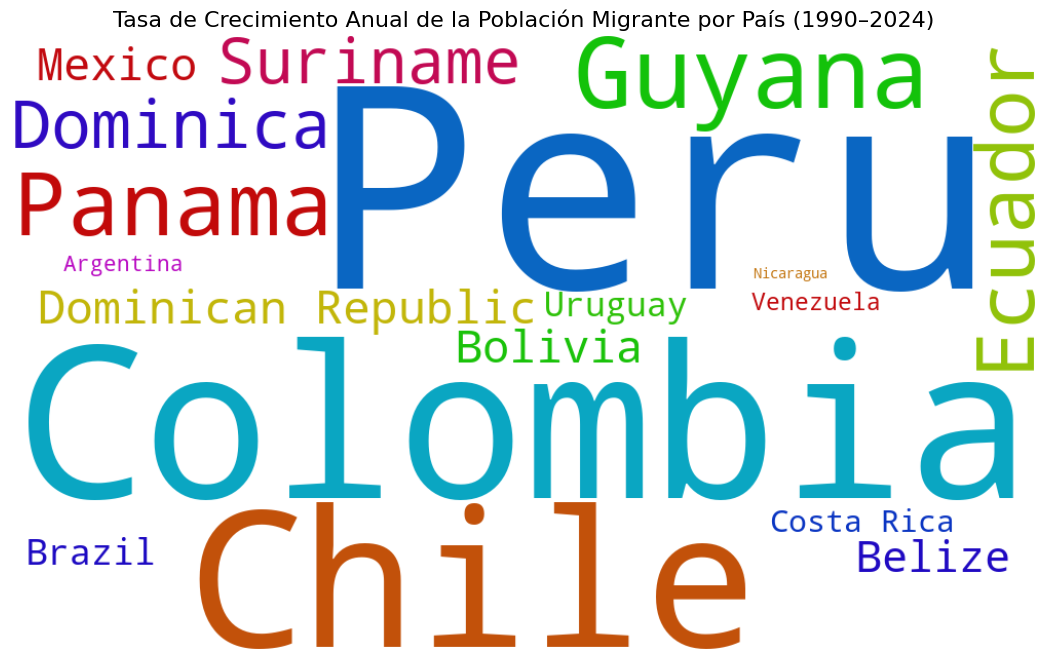

In [4]:
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear el Word Cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    color_func=lambda *args, **kwargs: "hsl({}, 90%, 40%)".format(np.random.randint(0, 360))
).generate_from_frequencies(tasa_dict)

# Mostrar
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Tasa de Crecimiento Anual de la Población Migrante por País (1990–2024)", fontsize=16)
plt.show()